In [45]:
from skimage import filters, img_as_float
from skimage.exposure import rescale_intensity

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import pims
import trackpy as tp

%matplotlib inline

In [2]:
bright_stack = pims.TiffStack('test_stack.tif')
dim_stack = pims.TiffStack('dim_stack.tif')

In [30]:
@pims.pipeline
def highpass_filter(frame, sigma=5):
    blurred_frame = filters.gaussian(frame, sigma, preserve_range=True)
    filtered_frame = frame - blurred_frame
    filtered_frame[filtered_frame<0] = 0
    
    return filtered_frame

In [33]:
filtered_bright_stack = highpass_filter(bright_stack)

In [87]:
f = tp.locate(filtered_bright_stack[379],25,minmass=10000)

(array([ 8., 11.,  8.,  7.,  2.,  5.,  3.,  3.,  4.,  4.,  1.,  1.,  2.,
         2.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([10154.4963802 , 12949.52703963, 15744.55769905, 18539.58835847,
        21334.6190179 , 24129.64967732, 26924.68033674, 29719.71099616,
        32514.74165559, 35309.77231501, 38104.80297443, 40899.83363386,
        43694.86429328, 46489.8949527 , 49284.92561212, 52079.95627155,
        54874.98693097, 57670.01759039, 60465.04824982, 63260.07890924,
        66055.10956866]),
 <a list of 20 Patch objects>)

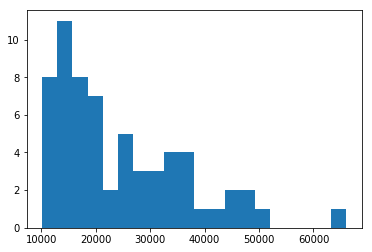

In [88]:
plt.hist(f['mass'],bins=20)

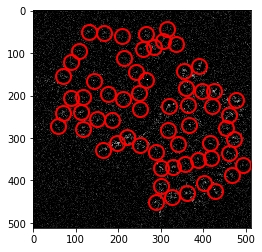

In [89]:
plt.figure()
tp.annotate(f,filtered_bright_stack[379])

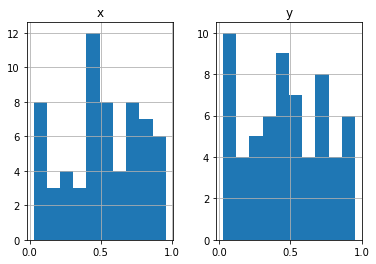

In [90]:
tp.subpx_bias(f)
plt.show()

In [91]:
f = tp.batch(filtered_bright_stack, 25, minmass=10000)

Frame 599: 59 features


In [92]:
t = tp.link_df(f,5,memory=1)

Frame 599: 59 trajectories present.


In [93]:
t1 = tp.filter_stubs(t,3)

In [94]:
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 14828
After: 3514


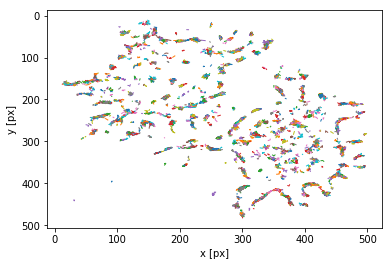

In [96]:
plt.figure()
tp.plot_traj(t1)

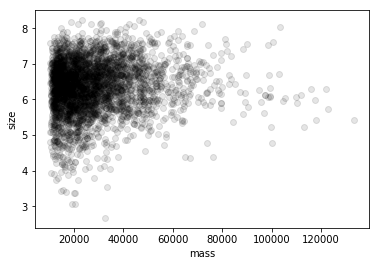

In [101]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass